In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Tuning
from sklearn.model_selection import GridSearchCV

# Evaulation Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [4]:
df= pd.read_csv('/content/Holiday_Package (1).csv')
df.head(1)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no


In [5]:
df.tail(1)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
871,872,no,74659,51,10,0,0,yes


In [6]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
df.drop('Unnamed: 0', axis=1, inplace= True)
df.head(1)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no


In [ ]:
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = pd.Categorical(df[i]).codes

In [ ]:
X= df.drop('Holliday_Package', axis=1)
y= df[['Holliday_Package']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total observations is', X_train.shape[0]+X_test.shape[0])

X_train (610, 7)
X_test (262, 7)
y_train (610, 1)
y_test (262, 1)
Total observations is 872


In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 'tol': [0.1, 0.001, 0.0001]}

In [ ]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = param_grid, cv = 10, scoring = 'f1')

In [ ]:
grid_search_LDA.fit (X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.0001]},
             scoring='f1')

In [ ]:
grid_search_LDA.best_params_

{'solver': 'svd', 'tol': 0.1}

In [ ]:
model_LDA_1 = grid_search_LDA.best_estimator_

In [ ]:
ytrain_predict_LDA = model_LDA_1.predict(X_train)
ytest_predict_LDA = model_LDA_1.predict(X_test)

# TRAIN
print('**Evaluation Parameters for LDA Combination 1:**')
                                            
print('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_LDA))
# Train AUC Score
probs = model_LDA_1.predict_proba(X_train)
ytrain_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data: %.3f' % auc)


# TEST


print('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_LDA))
# AUC Score
probs = model_LDA_1.predict_proba(X_test)
ytest_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for LDA Combination 1:**
**Classification Report Training Data:**
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.55      0.61       284

    accuracy                           0.67       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.67      0.67       610

AUC Score Training Data: 0.746
**Classification Report Testing Data:**
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       145
           1       0.58      0.56      0.57       117

    accuracy                           0.63       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.62      0.63      0.63       262

AUC Score Testing Data: 0.697


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
ytrain_predict = model_LDA_1.predict(X_train)
ytest_predict = model_LDA_1.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  254
False Positives:  72
False Negatives:  127
True Positives:  157


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  98
False Positives:  47
False Negatives:  51
True Positives:  66


AUC: 0.746


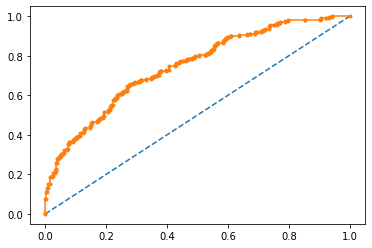

In [ ]:
probs =model_LDA_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.697


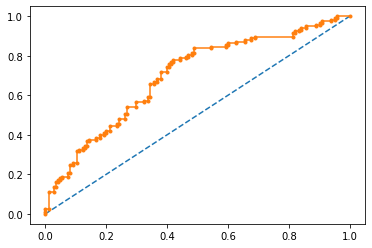

In [ ]:
probs =model_LDA_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
param_grid = {'solver': ['lsqr', 'eigen'], 'shrinkage' : ['auto'], 'tol': [0.1, 0.001, 0.0001, 0.00001]}


In [ ]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = param_grid, cv = 10, scoring = 'f1')

In [ ]:
grid_search_LDA.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto'], 'solver': ['lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.0001, 1e-05]},
             scoring='f1')

In [ ]:
grid_search_LDA.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [ ]:
model_LDA_2 = grid_search_LDA.best_estimator_

In [ ]:
ytrain_predict_LDA = model_LDA_2.predict(X_train)
ytest_predict_LDA = model_LDA_2.predict(X_test)

# TRAIN

print('**Evaluation Parameters for LDA Combination 2:**')                                            


print('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_LDA))
# Train AUC Score
probs = model_LDA_2.predict_proba(X_train)
ytrain_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_LDA))
# AUC Score
probs = model_LDA_2.predict_proba(X_test)
ytest_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for LDA Combination 2:**
**Classification Report Training Data:**
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       326
           1       0.69      0.55      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610

AUC Score Training Data: 0.745
**Classification Report Testing Data:**
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       145
           1       0.62      0.60      0.61       117

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262

AUC Score Testing Data: 0.703


In [ ]:
ytrain_predict1 = model_LDA_2.predict(X_train)
ytest_predict1 = model_LDA_2.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, ytrain_predict1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  256
False Positives:  70
False Negatives:  127
True Positives:  157


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  102
False Positives:  43
False Negatives:  47
True Positives:  70


AUC: 0.745


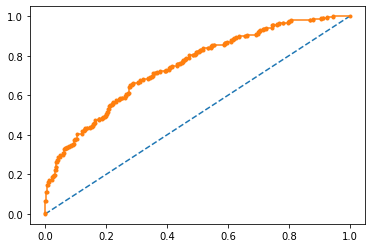

In [ ]:
probs =model_LDA_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.703


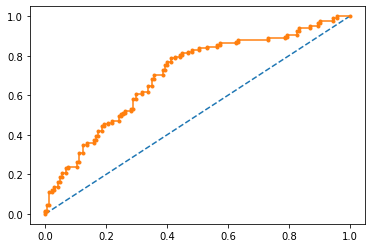

In [ ]:
probs =model_LDA_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()